# Disc Rand Var

In [1]:
#importing standard libs

import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

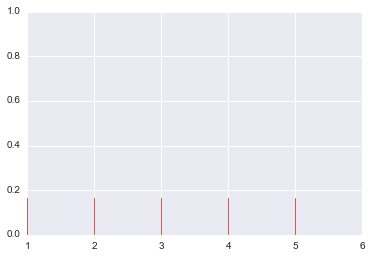

In [2]:
#dice roll
roll = [1, 2, 3, 4, 5, 6]

totprob =1 

prob_roll = totprob/len(roll)

#using rugplot(not correct way to use rug plot)
uni_plot = sns.rugplot(roll,height=prob_roll,c='indianred')


In [3]:
#Discrete Uni Rand Var

from scipy.stats import randint
low,high = 1,7
mean,var = randint.stats(low,high)
print 'The mean is %.2lf' %mean

The mean is 3.50


<Container object of 6 artists>

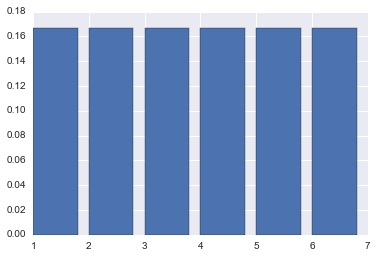

In [4]:
plt.bar(roll,randint.pmf(roll,low,high))

# Cont Rand Var

 a taxi ride in NYC takes 22 minutes. After taking some time measurements from experiments we gather that all the taxi rides are uniformly distributed between 19 and 27 minutes. What is the probability density function of a taxi ride, or f(x)?

In [5]:
a = 19
b=27
fx = 1.0/(b-a)
print "pdf is %1.3f" %fx

pdf is 0.125


In [6]:
var = ((b-a)**2)/12
print 'var is %1.1f' %var

var is 5.3


In [7]:
# what's the probability that the taxi ride will last at least 25 minutes?
fx_1 = 27.0/(b-a)
fx_2 = 25.0/(b-a)
ans = fx_1 - fx_2
print "atleast 25 min prob is %2.1f" %(100*ans)

atleast 25 min prob is 25.0


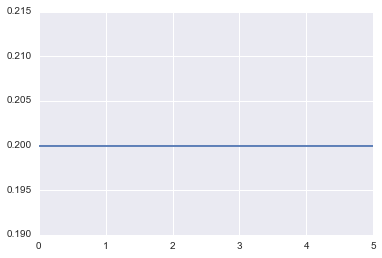

In [8]:
from scipy.stats import uniform
import numpy as np

A=0
B=5
x = np.linspace(A,B,100) #100 linearly spaced points between A and B

rv = uniform(loc=A,scale=B) #loc:start pt, scale:end pt

plt.plot(x,rv.pdf(x))

# Binomial Dist

Two players are playing basketball, player A and player B. Player A takes an average of 11 shots per game, and has an average success rate of 72%. Player B takes an average of 15 shots per game, but has an average success rate of 48%.

Question 1: What's the probability that Player A makes 6 shots in an average game?

Question 2: What's the probability that Player B makes 6 shots in an average game?


We can classify this as a binomial experiment if the following conditions are met:

1.) The process consists of a sequence of n trials.

2.) Only two exclusive outcomes are possible for each trial (A success and a failure)

3.) If the probability of a success is 'p' then the probability of failure is q=1-p

4.) The trials are independent.

The formula for a Binomial Distribution Probability Mass Function turns out to be:

$$Pr(X=k)=C(n,k)p^k (1-p)^{n-k}$$
Where n= number of trials,k=number of successes,p=probability of success,1-p=probability of failure (often written as q=1-p).

This means that to get exactly 'k' successes in 'n' trials, we want exactly 'k' successes:

$$p^k$$

and we want 'n-k' failures:
$$ (1−p)^{n−k}$$

Then finally, there are
C(n,k)
ways of putting 'k' successes in 'n' trials. So we multiply all these together to get the probability of exactly that many success and failures in those n trials!

Quick note, C(n,k) refers to the number of possible combinations of N things taken k at a time.

This is also equal to:
$$C(n,k) =  \frac{n!}{k!(n-k)!}$$

In [9]:
#PROB OF SUCCESS for A
p_A = 0.72
#number of shots
n_A = 11
#Make 6 shots
k = 6

import scipy.misc as sc # for Combination
#Cal C(n,k)
comb_A=sc.comb(n_A,k)

answer_A = comb_A*(p_A**k)*((1-p_A)**(n_A-k))

answer_A = 100*answer_A

p_B = 0.48
n_B = 15
comb_B=sc.comb(n_B,k)
answer_B=100*comb_B*(p_B**k)*((1-p_B)**(n_B-k))

print'prob of player A making six shots in average game is %1.1f%%' %answer_A

print'prob of player A making six shots in average game is %1.1f%%' %answer_B



prob of player A making six shots in average game is 11.1%
prob of player A making six shots in average game is 17.0%


 what about a higher amount of shots, will player's A higher probability take a stronger effect then? What's the probability of making 9 shots a game for either player?

In [10]:
#Set number of shots
k = 9

#Set new combinations
comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

# Everything else remains the same
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

#Print Answers
print ' \n'
print ' The probability of player A making 9 shots in an average game is %1.1f%% ' %answer_A
print '\n'
print ' The probability of player B making 9 shots in an average game is %1.1f%% ' %answer_B
print '\n'

 

 The probability of player A making 9 shots in an average game is 22.4% 


 The probability of player B making 9 shots in an average game is 13.4% 




In [11]:
#\mu=n*p
#\sigma=\sqrt{n*q*p}
# Get the mean
mu_A = n_A *p_A
mu_B = n_B *p_B

#Get the standard deviation
sigma_A = ( n_A *p_A*(1-p_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

# Now print results
print '\n'
print 'Player A will make an average of %1.0f +/- %1.0f shots per game' %(mu_A,sigma_A)
print '\n'
print 'Player B will make an average of %1.0f +/- %1.0f shots per game' %(mu_B,sigma_B)
print '\n'
print "NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!"



Player A will make an average of 8 +/- 1 shots per game


Player B will make an average of 7 +/- 2 shots per game


NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!


In [12]:
#using scipy
from scipy.stats import binom
mean,var = binom.stats(n_A,p_A)

print mean
print var**0.5

7.92
1.48916083752


In [13]:
#PMF for 10 coins

import numpy as np

n=10
p=0.5
x=range(n+1)
y=binom.pmf(x,n,p)
y

array([ 0.00097656,  0.00976563,  0.04394531,  0.1171875 ,  0.20507813,
        0.24609375,  0.20507813,  0.1171875 ,  0.04394531,  0.00976563,
        0.00097656])

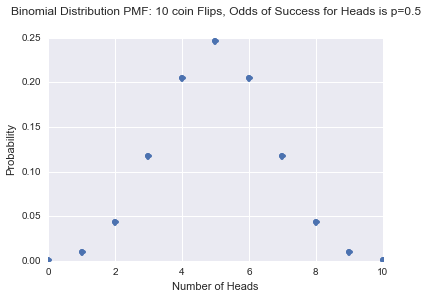

In [14]:
plt.plot(x,y,'o')
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

# Poisson Distr

$$ Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

The Poisson Distribution has the following characteristics:

1. Discrete outcomes (x=0,1,2,3...)
2. The number of occurrences can range from zero to infinity (theoretically). 
3. It describes the distribution of infrequent (rare) events.
4. Each event is independent of the other events.
5. Describes discrete events over an interval such as a time or distance.
6. The expected number of occurrences E(X) are assumed to be constant throughout the experiment.

Let's say a McDonald's has a lunch rush from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. What is the probability that exactly 7 customers enter during lunch rush? What is the probability that more than 10 customers arrive?

In [15]:
from math import exp,factorial
from __future__ import division

lamb=10 #cannot use lambda, lambda is a functino name

k = 7

prob = (lamb**k)*exp(-lamb)/factorial(k)

print "probability that exactly 7 customers enter during lunch rush is %2.2f%%" %(100*prob)



probability that exactly 7 customers enter during lunch rush is 9.01%


In [16]:
# USING scipy

from scipy.stats import poisson

mu=10

mean,var = poisson.stats(mu)

ods_seven=poisson(7,mu)

print "probability that exactly 7 customers enter during lunch rush is %2.2f%%" %(100*prob)

print "the mean is %2.2f" %mean


probability that exactly 7 customers enter during lunch rush is 9.01%
the mean is 10.00


<Container object of 30 artists>

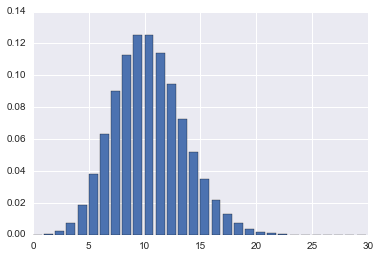

In [17]:
# Plotting PMF
import numpy as np
#theoreticall infinite #customers can show up, #seeing only upto 30
k=np.arange(30)
lamb = 10
pmf_pois = poisson.pmf(k,lamb)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.bar(k,pmf_pois)

In [18]:
#CDF
k,mu = 10,10
prob_upto_ten=poisson.cdf(k,mu)
print 'The probability that 10 or less customers show up is %2.1f %%.' %(100*prob_upto_ten)

The probability that 10 or less customers show up is 58.3 %.


In [19]:
prob_more_than_ten = 1 - prob_upto_ten

print 'The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten)

The probability that more than ten customers show up during lunch rush is 41.7 %.


# Normal Dist

The distribution is defined by the probability density function equation:


$$f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-1}{2z^2}$$
where, $$z=\frac{(X-\mu)}{\sigma}$$

In [20]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

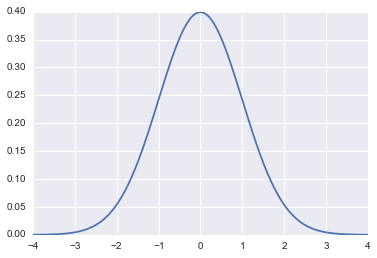

In [21]:
# scipy method
from scipy import stats

mean=0
std =1 
X=np.arange(-4,4,0.01)
Y=stats.norm.pdf(X,mean,std)
plt.plot(X,Y)

(array([  2.,   1.,   0.,   1.,   6.,   3.,   2.,   8.,   8.,   6.,   8.,
          9.,   8.,  15.,  27.,  27.,  27.,  41.,  38.,  46.,  45.,  47.,
         44.,  43.,  51.,  44.,  40.,  41.,  42.,  41.,  18.,  42.,  38.,
         36.,  28.,  25.,  10.,  20.,  15.,  14.,   8.,   5.,   4.,   7.,
          2.,   4.,   0.,   2.,   0.,   1.]),
 array([-0.31000502, -0.29763157, -0.28525813, -0.27288468, -0.26051123,
        -0.24813778, -0.23576434, -0.22339089, -0.21101744, -0.198644  ,
        -0.18627055, -0.1738971 , -0.16152366, -0.14915021, -0.13677676,
        -0.12440332, -0.11202987, -0.09965642, -0.08728297, -0.07490953,
        -0.06253608, -0.05016263, -0.03778919, -0.02541574, -0.01304229,
        -0.00066885,  0.0117046 ,  0.02407805,  0.03645149,  0.04882494,
         0.06119839,  0.07357184,  0.08594528,  0.09831873,  0.11069218,
         0.12306562,  0.13543907,  0.14781252,  0.16018596,  0.17255941,
         0.18493286,  0.1973063 ,  0.20967975,  0.2220532 ,  0.23442664,
 

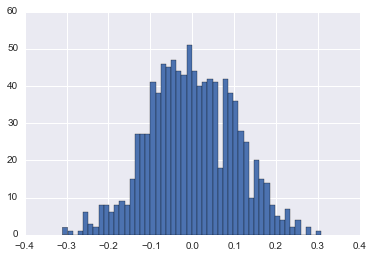

In [22]:
#using numpy
mu,sigma=0,0.1
norm_set=np.random.normal(mu,sigma,1000)

plt.hist(norm_set,bins=50)

# Sampling techniques

http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/blob/master/Sampling%20Techniques.ipynb

# T-distribution (Small sampling theory)

http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/blob/master/T%20Distribution%20%28Small%20Sampling%20Theory%29.ipynb

N>30 : Normal distr
N<30 : student-T distr
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

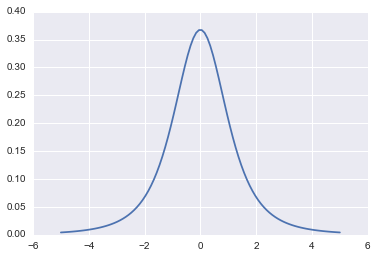

In [23]:
from scipy.stats import t
X=np.linspace(-5,5,100)
rv=t(3) #3 samples
plt.plot(X,rv.pdf(X))

# Hypothesis Testing


http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/blob/master/Hypothesis%20Testing%20and%20Confidence%20Intervals.ipynb

#  CHI square
http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/blob/master/Chi-Square.ipynb

# Bayes theorem

http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/blob/master/Bayes%27%20Theorem.ipynb

